In [ ]:
pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
import keras_tuner as kt
from tensorflow.keras.regularizers import l2

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd

In [ ]:
training_data = pd.read_csv('Training_Data.csv')
#training_data = pd.read_csv('/content/sample_data/Training_Data.csv')

In [ ]:
training_data.head()

,Flux_NII_6583/Flux_Ha_6562,Flux_OIII_5006/Flux_Hb_4861,Flux_OII_3726/Flux_OIII_5006,Flux_OI_6300/Flux_Ha_6562,Flux_SII_6716/Flux_Ha_6562,Flux_OIII_5006/Flux_OIII_4363,Flux_OII_3726/Flux_Hb_4861,Classification
0,0.425402,0.256996,2.490051,0.034856,0.184156,3.641603,0.639933,Star Forming
1,0.178823,1.028018,20.051688,0.043506,0.302325,22.231431,20.613505,Star Forming
2,0.315205,0.310238,3.621111,0.032175,0.177128,10.660915,1.123406,Star Forming
3,1.397530,0.686329,6.528850,0.169813,0.146544,21.957178,4.480941,LINER
4,0.202346,1.032948,1.988839,0.032636,0.216796,109.950507,2.054367,Star Forming


In [ ]:
flux_training_data = training_data.drop(columns = ['Classification'])
Galaxy_Classifications = training_data['Classification']
print(set(Galaxy_Classifications))

{'Star Forming', 'LINER', 'Seyfert', 'Composite'}


In [ ]:
def change_values(value):
    if (value == 'Star Forming'):
      return 0
    if (value == "LINER"):
      return 1
    if (value == "Composite"):
      return 2
    if (value == 'Seyfert'):
      return 3

In [ ]:
Galaxy_Classifications = Galaxy_Classifications.apply(change_values)

<h1> Determining the Number of Layers <h1>


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(flux_training_data, Galaxy_Classifications, test_size=0.2, random_state=42)

In [ ]:
# y_train = to_categorical(y_train, num_classes=4)

In [ ]:
# def build_model(hp):
#     model = keras.Sequential()

#     # Add an input layer
#     model.add(layers.Input(shape=flux_training_data.shape[1]))

#     # Tune the number of layers
#     num_layers = hp.Int('num_layers', min_value=1, max_value=20, step=1)
#     for i in range(num_layers):
#         #model.add(layers.Dense(
#             #units=hp.Int(f'layer_neurons', min_value=16, max_value=256, step=16),
#             #activation='relu'
#         #))
#         model.add(tf.keras.layers.Dense(32, activation='relu'))
#     # Output layer
#     model.add(layers.Dense(4, activation='softmax'))
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model

In [ ]:
# layer_tuner = RandomSearch(
#     build_model,
#     objective='accuracy',  # Optimize for accuracy
#     max_trials=20,          # Number of combinations to try
#     directory='layer_search',  # Directory to store the results
#     project_name='layer_search',
#     max_consecutive_failed_trials= 100
# )

In [ ]:
# layer_tuner.search(X_train, y_train, validation_split=0.2, epochs=10)

In [ ]:
# best_hyperparameters = layer_tuner.get_best_hyperparameters(num_trials=1)[0]
# best_model = layer_tuner.get_best_models(num_models=1)[0]

In [ ]:
# print(best_hyperparameters.get_config())

<h1> Determing the Number of Neurons <h1>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(flux_training_data, Galaxy_Classifications, test_size=0.2, random_state=42)

In [ ]:
y_train = to_categorical(y_train, num_classes=4)

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    #Tune number of neurons for each layer
    model.add(layers.Dense(
                units=hp.Int('layer1_neurons', min_value=16, max_value=96, step=16),
                activation='relu', kernel_regularizer=l2(0.001)
            ))
    model.add(layers.Dense(
                units=hp.Int('layer_2_neurons', min_value=16, max_value=96, step=16),
                activation='relu', kernel_regularizer=l2(0.01)
            ))
    model.add(layers.Dense(
                units=hp.Int('layer_3_neurons', min_value=16, max_value=96, step=16),
                activation='relu', kernel_regularizer=l2(0.02)
            ))

    # Output layer
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
    tuner = kt.GridSearch(
    build_model,
    objective='accuracy',  # Define your objective metric
    max_trials=100,              # Number of combinations to try
    directory='grid_search',    # Directory to store the results
    project_name='neuron_grid_search',
    max_consecutive_failed_trials= 100
)

In [ ]:
results = []

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=10)

# Iterate through the trials to collect results
for trial in tuner.oracle.get_best_trials(100):
    result = {
        'hyperparameters': trial.hyperparameters.values,
        'accuracy': trial.metrics.get_best_value('accuracy')
    }
    results.append(result)

# Print the results
for result in results:
    print(f"Hyperparameters: {result['hyperparameters']}, Accuracy: {result['accuracy']}")

Trial 100 Complete [00h 01m 25s]
accuracy: 0.9624224901199341

Best accuracy So Far: 0.9668392539024353
Total elapsed time: 02h 05m 34s
Hyperparameters: {'layer1_neurons': 48, 'layer_2_neurons': 64, 'layer_3_neurons': 80}, Accuracy: 0.9668392539024353
Hyperparameters: {'layer1_neurons': 16, 'layer_2_neurons': 32, 'layer_3_neurons': 64}, Accuracy: 0.9661192893981934
Hyperparameters: {'layer1_neurons': 32, 'layer_2_neurons': 16, 'layer_3_neurons': 64}, Accuracy: 0.9659392833709717
Hyperparameters: {'layer1_neurons': 16, 'layer_2_neurons': 16, 'layer_3_neurons': 64}, Accuracy: 0.9656762480735779
Hyperparameters: {'layer1_neurons': 16, 'layer_2_neurons': 80, 'layer_3_neurons': 96}, Accuracy: 0.9656485319137573
Hyperparameters: {'layer1_neurons': 48, 'layer_2_neurons': 32, 'layer_3_neurons': 96}, Accuracy: 0.9653993248939514
Hyperparameters: {'layer1_neurons': 16, 'layer_2_neurons': 96, 'layer_3_neurons': 48}, Accuracy: 0.9653024077415466
Hyperparameters: {'layer1_neurons': 48, 'layer_2_neu

In [ ]:
print(results)
# best_hyperparameters = new_tuner.get_best_hyperparameters(num_trials=1)[0]
# print(best_hyperparameters.get_config())

In [ ]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hyperparameters.get_config())

<h1> Determining Activiation Function <h1>

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(flux_training_data, Galaxy_Classifications, test_size=0.2, random_state=42)

In [ ]:
# y_train = to_categorical(y_train, num_classes=4)

In [ ]:
# def build_model(hp):
#     model = keras.Sequential()
#     #Input Layer
#     model.add(layers.Input(shape=flux_training_data.shape[1]))
#     #Hidden Layers
#     model.add(layers.Dense(32, activation = 'relu'))
#     model.add(layers.Dense(96, activation = 'relu'))
#     model.add(layers.Dense(64, activation = 'relu'))
#     # Output layer
#     optimizer = hp.Choice('optimizer', ['adam', 'SGD', 'RMSprop', 'Adagrad', 'Ftrl'])
#     model.add(layers.Dense(4, activation='softmax'))
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model

In [ ]:
# tuner = kt.GridSearch(
#     build_model,
#     objective='accuracy',
#     max_trials=5,  # Specify the number of trials
#     directory='learning_rate_tuning',
#     project_name='tune_learning_rate2'
# )


In [ ]:
# results = []

# Search for the best hyperparameters
# tuner.search(X_train, y_train, epochs=10)

# # Iterate through the trials to collect results
# for trial in tuner.oracle.get_best_trials(100):
#     result = {
#         'hyperparameters': trial.hyperparameters.values,
#         'accuracy': trial.metrics.get_best_value('accuracy')
#     }
#     results.append(result)

# # Print the results
# for result in results:
#     print(f"Hyperparameters: {result['hyperparameters']}, Accuracy: {result['accuracy']}")

<h1> Regularization Parameters <h1>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(flux_training_data, Galaxy_Classifications, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=4)


In [ ]:
def build_model(hp):
    hp_reg = hp.Choice('reg_rate1', values=[0.001, 0.01, .005, 0.02, 0.03])
    hp_reg2 = hp.Choice('reg_rate2', values=[0.001, 0.01, .005, 0.02, 0.03])
    hp_reg3 = hp.Choice('reg_rate3', values=[0.001, 0.01, .005, 0.02, 0.03])
    model = keras.Sequential()
    #Input Layer
    model.add(layers.Input(shape=flux_training_data.shape[1]))
    #Hidden Layers
    model.add(layers.Dense(32, activation = 'relu', kernel_regularizer=l2(hp_reg)))
    model.add(layers.Dense(96, activation = 'relu', kernel_regularizer=l2(hp_reg2)))
    model.add(layers.Dense(64, activation = 'relu', kernel_regularizer=l2(hp_reg3)))
    # Output layer

    model.add(layers.Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Initialize the RandomSearch tuner
tuner = kt.GridSearch(
    build_model,
    objective='accuracy',  # Use the metric you want to optimize
    max_trials=75,
    directory='my_tuner_dir',
    project_name='my_neural_network0'
)

In [ ]:
# Create a list to store the results
results = []

# Search for the best hyperparameters
tuner.search(x=X_train, y=y_train, epochs=10)

# Iterate through the trials to collect results
for trial in tuner.oracle.get_best_trials(100):
    result = {
        'hyperparameters': trial.hyperparameters.values,
        'accuracy': trial.metrics.get_best_value('accuracy')
    }
    results.append(result)

# Print the results
for result in results:
    print(f"Hyperparameters: {result['hyperparameters']}, Accuracy: {result['accuracy']}")

Hyperparameters: {'reg_rate1': 0.001, 'reg_rate2': 0.001, 'reg_rate3': 0.005}, Accuracy: 0.9713807106018066
Hyperparameters: {'reg_rate1': 0.001, 'reg_rate2': 0.001, 'reg_rate3': 0.001}, Accuracy: 0.9710622429847717
Hyperparameters: {'reg_rate1': 0.001, 'reg_rate2': 0.001, 'reg_rate3': 0.02}, Accuracy: 0.9688884615898132
Hyperparameters: {'reg_rate1': 0.001, 'reg_rate2': 0.005, 'reg_rate3': 0.001}, Accuracy: 0.9686392545700073
Hyperparameters: {'reg_rate1': 0.001, 'reg_rate2': 0.01, 'reg_rate3': 0.001}, Accuracy: 0.9685838222503662
Hyperparameters: {'reg_rate1': 0.001, 'reg_rate2': 0.001, 'reg_rate3': 0.03}, Accuracy: 0.9685284495353699
Hyperparameters: {'reg_rate1': 0.005, 'reg_rate2': 0.001, 'reg_rate3': 0.005}, Accuracy: 0.9685284495353699
Hyperparameters: {'reg_rate1': 0.001, 'reg_rate2': 0.005, 'reg_rate3': 0.005}, Accuracy: 0.9684454202651978
Hyperparameters: {'reg_rate1': 0.001, 'reg_rate2': 0.005, 'reg_rate3': 0.01}, Accuracy: 0.9684315323829651
Hyperparameters: {'reg_rate1': 0

In [ ]:
# reg_rate1: 0.001, 'reg_rate2': 0.01, 'reg_rate3': 0.02

<h1> Dropout Layers <h1>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(flux_training_data, Galaxy_Classifications, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=4)

In [ ]:
def build_model(hp):
    model = keras.Sequential()

    model.add(layers.Dense(16, activation = 'relu', kernel_regularizer=l2(.001)))
    model.add(layers.Dense(64, activation = 'relu', kernel_regularizer=l2(.01)))
    model.add(layers.Dense(32, activation = 'relu', kernel_regularizer=l2(.02)))
    model.add(keras.layers.Dropout(hp.Float("dropout_3", min_value=0.1, max_value=0.5, step=0.1)))


    model.add(layers.Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Initialize the RandomSearch tuner
tuner = kt.GridSearch(
    build_model,
    objective='accuracy',  # Use the metric you want to optimize
    max_trials=75,
    directory='my_tuner_dir',
    project_name='my_neural_network0'
)

In [ ]:
# Create a list to store the results
results = []

# Search for the best hyperparameters
tuner.search(x=X_train, y=y_train, epochs=10)

# Iterate through the trials to collect results
for trial in tuner.oracle.get_best_trials(100):
    result = {
        'hyperparameters': trial.hyperparameters.values,
        'accuracy': trial.metrics.get_best_value('accuracy')
    }
    results.append(result)

# Print the results
for result in results:
    print(f"Hyperparameters: {result['hyperparameters']}, Accuracy: {result['accuracy']}")

Trial 5 Complete [00h 00m 56s]
accuracy: 0.9017778038978577

Best accuracy So Far: 0.9553611278533936
Total elapsed time: 00h 05m 31s
Hyperparameters: {'dropout_3': 0.1}, Accuracy: 0.9553611278533936
Hyperparameters: {'dropout_3': 0.2}, Accuracy: 0.9505289196968079
Hyperparameters: {'dropout_3': 0.4}, Accuracy: 0.9493935704231262
Hyperparameters: {'dropout_3': 0.30000000000000004}, Accuracy: 0.9424844980239868
Hyperparameters: {'dropout_3': 0.5}, Accuracy: 0.9017778038978577


<h1> Learning Rate <h1>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(flux_training_data, Galaxy_Classifications, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=4)

In [ ]:
def build_model(hp):
    hp_learning_rate = hp.Choice('learning rate', [1e-5, 1e-4, 1e-3, 1e-2, 1e-1])
    model = keras.Sequential()
    #Input Layer
    model.add(layers.Input(shape=flux_training_data.shape[1]))
    #Hidden Layers
    model.add(layers.Dense(16, activation = 'relu', kernel_regularizer=l2(.001)))
    model.add(layers.Dense(64, activation = 'relu', kernel_regularizer=l2(.01)))
    model.add(layers.Dense(32, activation = 'relu', kernel_regularizer=l2(.02)))
    # Output layer
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Initialize the RandomSearch tuner
tuner = kt.GridSearch(
    build_model,
    objective='accuracy',  # Use the metric you want to optimize
    max_trials=75,
    directory='my_tuner_dir',
    project_name='my_neural_network0'
)

In [ ]:
# Create a list to store the results
results = []

# Search for the best hyperparameters
tuner.search(x=X_train, y=y_train, epochs=10)

# Iterate through the trials to collect results
for trial in tuner.oracle.get_best_trials(100):
    result = {
        'hyperparameters': trial.hyperparameters.values,
        'accuracy': trial.metrics.get_best_value('accuracy')
    }
    results.append(result)

# Print the results
for result in results:
    print(f"Hyperparameters: {result['hyperparameters']}, Accuracy: {result['accuracy']}")

Trial 5 Complete [00h 01m 34s]
accuracy: 0.6873892545700073

Best accuracy So Far: 0.960151731967926
Total elapsed time: 00h 05m 56s
Hyperparameters: {'learning rate': 0.001}, Accuracy: 0.960151731967926
Hyperparameters: {'learning rate': 0.01}, Accuracy: 0.935769259929657
Hyperparameters: {'learning rate': 0.0001}, Accuracy: 0.8497867584228516
Hyperparameters: {'learning rate': 1e-05}, Accuracy: 0.6907537579536438
Hyperparameters: {'learning rate': 0.1}, Accuracy: 0.6873892545700073


<h1> Final Model Architecture <h1>

Final Hyperparameters:

Number of Layers: 1 Input, 3 Hidden, 1 Output

Neurons per Hidden Layer: Layer 1: 16 Layer 2: 64 Layer 3: 32

Activation Function for each Layer: relu

Regularization Parameters: Layer 1: 0.001, Layer 2: 0.01 Layer 3: 0.02

Any Dropout Layers: 0.2

Learning Rate: 0.001

Optimization Function: Adam

Loss Function:



In [ ]:
final_model = keras.Sequential()

#Input Layer
final_model.add(layers.Input(shape=flux_training_data.shape[1]))
#Hidden Layers
final_model.add(layers.Dense(48, activation = 'relu', kernel_regularizer=l2(.001)))
final_model.add(layers.Dense(64, activation = 'relu', kernel_regularizer=l2(.01)))
final_model.add(layers.Dense(80, activation = 'relu', kernel_regularizer=l2(.02)))
#Dropout Layer
final_model.add(layers.Dropout(0.2))
#Output Layer
final_model.add(layers.Dense(4, activation='softmax'))


#Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


final_model.compile(optimizer = optimizer,  loss='categorical_crossentropy',  metrics=['accuracy'])


<h1> Performance on Initial Training Set <h1>

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(flux_training_data, Galaxy_Classifications, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(flux_training_data, Galaxy_Classifications, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)
y_val = to_categorical(y_val, num_classes=4)

In [ ]:
# from sklearn.utils import class_weight

# classe_arr = np.unique(y_train)

# class_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = classe_arr, y = y_train)

# print(class_weights)

# y_train = to_categorical(y_train, num_classes=4)
# y_test = to_categorical(y_test, num_classes=4)

[0.36369496 2.46632974 1.47347805 6.01265401]


In [ ]:
history = final_model.fit(X_train, y_train, epochs = 10, validation_data=(X_val, y_val))


Epoch 1/10
1975/1975 [==============================] - 6s 3ms/step - loss: 1.6126 - accuracy: 0.8063 - val_loss: 0.8124 - val_accuracy: 0.9421
Epoch 2/10
1975/1975 [==============================] - 6s 3ms/step - loss: 0.7256 - accuracy: 0.9186 - val_loss: 0.5322 - val_accuracy: 0.9383
Epoch 3/10
1975/1975 [==============================] - 11s 6ms/step - loss: 0.5132 - accuracy: 0.9284 - val_loss: 0.3908 - val_accuracy: 0.9453
Epoch 4/10
1975/1975 [==============================] - 5s 3ms/step - loss: 0.3230 - accuracy: 0.9516 - val_loss: 0.2570 - val_accuracy: 0.9709
Epoch 5/10
1975/1975 [==============================] - 5s 2ms/step - loss: 0.2789 - accuracy: 0.9527 - val_loss: 0.4395 - val_accuracy: 0.9274
Epoch 6/10
1975/1975 [==============================] - 7s 4ms/step - loss: 0.2410 - accuracy: 0.9574 - val_loss: 0.2144 - val_accuracy: 0.9572
Epoch 7/10
1975/1975 [==============================] - 5s 3ms/step - loss: 0.2263 - accuracy: 0.9579 - val_loss: 0.2049 - val_accuracy

In [ ]:
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

424/424 [==============================] - 1s 2ms/step - loss: 0.2296 - accuracy: 0.9599
Test Accuracy: 0.9599055051803589


In [ ]:
predictions = final_model.predict(X_test)

424/424 [==============================] - 1s 2ms/step


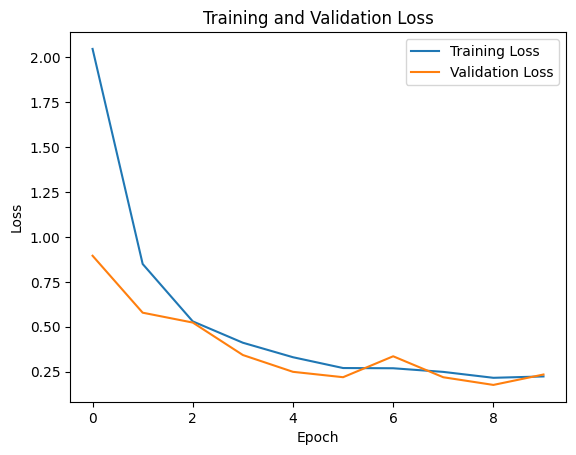

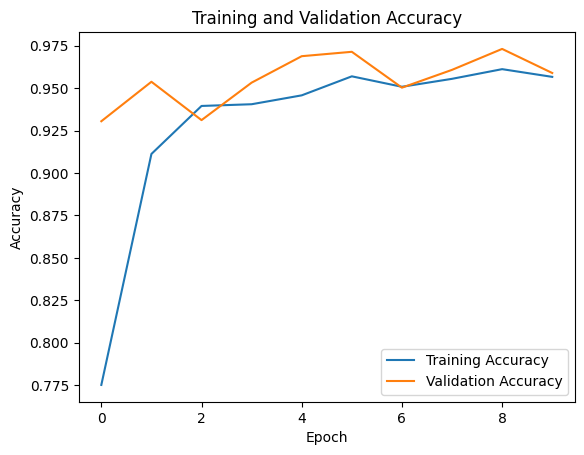

In [ ]:
# Access training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Access training and validation accuracy values (if applicable)
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting the loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# If accuracy information is available, you can also plot accuracy curves
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(predictions, axis=1)
report = classification_report(y_test_class, y_pred_class)

In [ ]:
#0 is Star Forming
#1 is LINER
#2 is Composite
#3 is Seyfert

print(report)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     12314
           1       0.98      0.95      0.96      1864
           2       0.85      0.97      0.90      3137
           3       0.80      0.99      0.89       742

    accuracy                           0.96     18057
   macro avg       0.91      0.97      0.93     18057
weighted avg       0.96      0.96      0.96     18057



In [ ]:
confusion = confusion_matrix(y_test_class, y_pred_class)
print(confusion)

[[12158     0   147     9]
 [   28  1775    47    14]
 [  160    61  2901    15]
 [   32    14    14   682]]


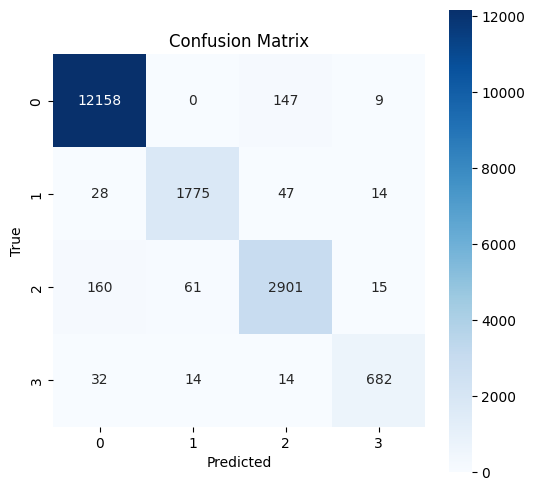

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
#plt.show()
plt.savefig('confusion_matrix.png', format='png')

<h1> Performance on Testing Set 1 <h1>

In [ ]:
data2 = pd.read_csv('Testing_.15.csv')

In [ ]:
Data = {
    'specObjID': data2['specObjID'],
    'ra': data2['ra'],
    'dec': data2['dec'],
    'redshift': data2['z'],
    'Flux_NII_6583/Flux_Ha_6562': data2['Flux_NII_6583']/data2['Flux_Ha_6562'],
    'Flux_OIII_5006/Flux_Hb_4861': data2['Flux_OIII_5006']/data2['Flux_Hb_4861'],
    'Flux_OII_3726/Flux_OIII_5006': data2['Flux_OII_3726']/data2['Flux_OIII_5006'],
    'Flux_OI_6300/Flux_Ha_6562': data2['Flux_OI_6300']/data2['Flux_Ha_6562'],
    'Flux_SII_6716/Flux_Ha_6562': data2['Flux_SII_6716']/data2['Flux_Ha_6562'],
    'Flux_OIII_5006/Flux_OIII_4363':data2['Flux_OIII_5006']/data2['Flux_OIII_4363'],
    'Flux_OII_3726/Flux_Hb_4861': data2['Flux_OII_3726']/data2['Flux_Hb_4861'],
    'Classification': data2['bpt']
}
data = pd.DataFrame(data = Data)

In [ ]:
threshold = 1000
Q1 = data['Flux_NII_6583/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_NII_6583/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_NII_6583/Flux_Ha_6562'] >= lower_bound) & (data['Flux_NII_6583/Flux_Ha_6562'] <= upper_bound)]


Q1 = data['Flux_OIII_5006/Flux_Hb_4861'].quantile(0.25)
Q3 = data['Flux_OIII_5006/Flux_Hb_4861'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OIII_5006/Flux_Hb_4861'] >= lower_bound) & (data['Flux_OIII_5006/Flux_Hb_4861'] <= upper_bound)]

Q1 = data['Flux_OII_3726/Flux_OIII_5006'].quantile(0.25)
Q3 = data['Flux_OII_3726/Flux_OIII_5006'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OII_3726/Flux_OIII_5006'] >= lower_bound) & (data['Flux_OII_3726/Flux_OIII_5006'] <= upper_bound)]

Q1 = data['Flux_OI_6300/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_OI_6300/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OI_6300/Flux_Ha_6562'] >= lower_bound) & (data['Flux_OI_6300/Flux_Ha_6562'] <= upper_bound)]

Q1 = data['Flux_SII_6716/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_SII_6716/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_SII_6716/Flux_Ha_6562'] >= lower_bound) & (data['Flux_SII_6716/Flux_Ha_6562'] <= upper_bound)]

Q1 = data['Flux_OIII_5006/Flux_OIII_4363'].quantile(0.25)
Q3 = data['Flux_OIII_5006/Flux_OIII_4363'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OIII_5006/Flux_OIII_4363'] >= lower_bound) & (data['Flux_OIII_5006/Flux_OIII_4363'] <= upper_bound)]

Q1 = data['Flux_OII_3726/Flux_Hb_4861'].quantile(0.25)
Q3 = data['Flux_OII_3726/Flux_Hb_4861'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
testing_data = data[(data['Flux_OII_3726/Flux_Hb_4861'] >= lower_bound) & (data['Flux_OII_3726/Flux_Hb_4861'] <= upper_bound)]

In [ ]:
flux_testing_data = testing_data.drop(columns = ['specObjID', 'ra', 'dec', 'redshift','Classification'])
Galaxy_Classifications_testing = testing_data['Classification']

In [ ]:
Galaxy_Classifications_testing = Galaxy_Classifications_testing.apply(change_values)

In [ ]:
Galaxy_Classifications_testing = to_categorical(Galaxy_Classifications_testing, num_classes=4)

In [ ]:
test_loss, test_accuracy = final_model.evaluate(flux_testing_data, Galaxy_Classifications_testing)

4187/4187 [==============================] - 5s 1ms/step - loss: 0.2049 - accuracy: 0.9657


In [ ]:
predictions = final_model.predict(flux_testing_data)

4187/4187 [==============================] - 4s 931us/step


In [ ]:
y_test_class = np.argmax(Galaxy_Classifications_testing, axis=1)
y_pred_class = np.argmax(predictions, axis=1)
report = classification_report(y_test_class, y_pred_class)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     82376
           1       0.95      0.96      0.95     17155
           2       0.94      0.92      0.93     26703
           3       0.96      0.92      0.94      7746

    accuracy                           0.97    133980
   macro avg       0.96      0.95      0.95    133980
weighted avg       0.97      0.97      0.97    133980



<h1> Performance on Testing Set 2 <h1>

In [ ]:
data2 = pd.read_csv('Testing_.3.csv')

In [ ]:
Data = {
    'specObjID': data2['specObjID'],
    'ra': data2['ra'],
    'dec': data2['dec'],
    'redshift': data2['z'],
    'Flux_NII_6583/Flux_Ha_6562': data2['Flux_NII_6583']/data2['Flux_Ha_6562'],
    'Flux_OIII_5006/Flux_Hb_4861': data2['Flux_OIII_5006']/data2['Flux_Hb_4861'],
    'Flux_OII_3726/Flux_OIII_5006': data2['Flux_OII_3726']/data2['Flux_OIII_5006'],
    'Flux_OI_6300/Flux_Ha_6562': data2['Flux_OI_6300']/data2['Flux_Ha_6562'],
    'Flux_SII_6716/Flux_Ha_6562': data2['Flux_SII_6716']/data2['Flux_Ha_6562'],
    'Flux_OIII_5006/Flux_OIII_4363':data2['Flux_OIII_5006']/data2['Flux_OIII_4363'],
    'Flux_OII_3726/Flux_Hb_4861': data2['Flux_OII_3726']/data2['Flux_Hb_4861'],
    'Classification': data2['bpt']
}
data = pd.DataFrame(data = Data)

In [ ]:
threshold = 1000
Q1 = data['Flux_NII_6583/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_NII_6583/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_NII_6583/Flux_Ha_6562'] >= lower_bound) & (data['Flux_NII_6583/Flux_Ha_6562'] <= upper_bound)]


Q1 = data['Flux_OIII_5006/Flux_Hb_4861'].quantile(0.25)
Q3 = data['Flux_OIII_5006/Flux_Hb_4861'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OIII_5006/Flux_Hb_4861'] >= lower_bound) & (data['Flux_OIII_5006/Flux_Hb_4861'] <= upper_bound)]

Q1 = data['Flux_OII_3726/Flux_OIII_5006'].quantile(0.25)
Q3 = data['Flux_OII_3726/Flux_OIII_5006'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OII_3726/Flux_OIII_5006'] >= lower_bound) & (data['Flux_OII_3726/Flux_OIII_5006'] <= upper_bound)]

Q1 = data['Flux_OI_6300/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_OI_6300/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OI_6300/Flux_Ha_6562'] >= lower_bound) & (data['Flux_OI_6300/Flux_Ha_6562'] <= upper_bound)]

Q1 = data['Flux_SII_6716/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_SII_6716/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_SII_6716/Flux_Ha_6562'] >= lower_bound) & (data['Flux_SII_6716/Flux_Ha_6562'] <= upper_bound)]

Q1 = data['Flux_OIII_5006/Flux_OIII_4363'].quantile(0.25)
Q3 = data['Flux_OIII_5006/Flux_OIII_4363'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OIII_5006/Flux_OIII_4363'] >= lower_bound) & (data['Flux_OIII_5006/Flux_OIII_4363'] <= upper_bound)]

Q1 = data['Flux_OII_3726/Flux_Hb_4861'].quantile(0.25)
Q3 = data['Flux_OII_3726/Flux_Hb_4861'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
testing_data = data[(data['Flux_OII_3726/Flux_Hb_4861'] >= lower_bound) & (data['Flux_OII_3726/Flux_Hb_4861'] <= upper_bound)]

In [ ]:
flux_testing_data = testing_data.drop(columns = ['specObjID', 'ra', 'dec', 'redshift','Classification'])
Galaxy_Classifications_testing = testing_data['Classification']

In [ ]:
Galaxy_Classifications_testing = Galaxy_Classifications_testing.apply(change_values)
Galaxy_Classifications_testing = to_categorical(Galaxy_Classifications_testing, num_classes=4)

In [ ]:
test_loss, test_accuracy = final_model.evaluate(flux_testing_data, Galaxy_Classifications_testing)

5414/5414 [==============================] - 6s 1ms/step - loss: 0.2139 - accuracy: 0.9624


In [ ]:
predictions = final_model.predict(flux_testing_data)

5414/5414 [==============================] - 6s 1ms/step


In [ ]:
y_test_class = np.argmax(Galaxy_Classifications_testing, axis=1)
y_pred_class = np.argmax(predictions, axis=1)
report = classification_report(y_test_class, y_pred_class)

In [ ]:
#0 is Star Forming
#1 is LINER
#2 is Composite
#3 is Seyfert

print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     95452
           1       0.95      0.96      0.95     27941
           2       0.94      0.92      0.93     37185
           3       0.96      0.93      0.94     12640

    accuracy                           0.96    173218
   macro avg       0.96      0.95      0.95    173218
weighted avg       0.96      0.96      0.96    173218



<h1> Using Less Features <h1>

In [ ]:
flux_training_data_BPT = training_data.drop(columns = ['Classification'])

In [ ]:
flux_training_data_BPT.head()

,Flux_NII_6583/Flux_Ha_6562,Flux_OIII_5006/Flux_Hb_4861,Flux_OII_3726/Flux_OIII_5006,Flux_OI_6300/Flux_Ha_6562,Flux_SII_6716/Flux_Ha_6562,Flux_OIII_5006/Flux_OIII_4363,Flux_OII_3726/Flux_Hb_4861
0,0.425402,0.256996,2.490051,0.034856,0.184156,3.641603,0.639933
1,0.178823,1.028018,20.051688,0.043506,0.302325,22.231431,20.613505
2,0.315205,0.310238,3.621111,0.032175,0.177128,10.660915,1.123406
3,1.397530,0.686329,6.528850,0.169813,0.146544,21.957178,4.480941
4,0.202346,1.032948,1.988839,0.032636,0.216796,109.950507,2.054367


In [ ]:
flux_training_data_BPT = training_data.drop(columns = ['Classification', 'Flux_OII_3726/Flux_OIII_5006', 'Flux_OI_6300/Flux_Ha_6562', 'Flux_SII_6716/Flux_Ha_6562', 'Flux_OIII_5006/Flux_OIII_4363', 'Flux_OII_3726/Flux_Hb_4861' ])

In [ ]:
Galaxy_Classifications = training_data['Classification']
def change_values(value):
    if (value == 'Star Forming'):
      return 0
    if (value == "LINER"):
      return 1
    if (value == "Composite"):
      return 2
    if (value == 'Seyfert'):
      return 3
Galaxy_Classifications = Galaxy_Classifications.apply(change_values)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(flux_training_data_BPT, Galaxy_Classifications, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)


In [ ]:
final_model = keras.Sequential()

#Input Layer
final_model.add(layers.Input(shape=flux_training_data_BPT.shape[1]))
#Hidden Layers
final_model.add(layers.Dense(16, activation = 'relu', kernel_regularizer=l2(.001)))
final_model.add(layers.Dense(64, activation = 'relu', kernel_regularizer=l2(.01)))
final_model.add(layers.Dense(32, activation = 'relu', kernel_regularizer=l2(.02)))
#Dropout Layer
final_model.add(layers.Dropout(0.2))
#Output Layer
final_model.add(layers.Dense(4, activation='softmax'))


#Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


final_model.compile(optimizer = optimizer,  loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
final_model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
2257/2257 [==============================] - 5s 1ms/step - loss: 0.4000 - accuracy: 0.9277
Epoch 2/10
2257/2257 [==============================] - 3s 1ms/step - loss: 0.1834 - accuracy: 0.9688
Epoch 3/10
2257/2257 [==============================] - 3s 1ms/step - loss: 0.1525 - accuracy: 0.9737
Epoch 4/10
2257/2257 [==============================] - 4s 2ms/step - loss: 0.1391 - accuracy: 0.9746
Epoch 5/10
2257/2257 [==============================] - 3s 1ms/step - loss: 0.1297 - accuracy: 0.9766
Epoch 6/10
2257/2257 [==============================] - 3s 1ms/step - loss: 0.1227 - accuracy: 0.9770
Epoch 7/10
2257/2257 [==============================] - 3s 1ms/step - loss: 0.1165 - accuracy: 0.9780
Epoch 8/10
2257/2257 [==============================] - 4s 2ms/step - loss: 0.1129 - accuracy: 0.9790
Epoch 9/10
2257/2257 [==============================] - 3s 1ms/step - loss: 0.1082 - accuracy: 0.9800
Epoch 10/10
2257/2257 [==============================] - 3s 1ms/step - loss: 0.105

In [ ]:
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

565/565 [==============================] - 2s 3ms/step - loss: 0.0918 - accuracy: 0.9878
Test Accuracy: 0.987816333770752


In [ ]:
predictions = final_model.predict(X_test)

565/565 [==============================] - 1s 2ms/step


In [ ]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(predictions, axis=1)
report = classification_report(y_test_class, y_pred_class)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12314
           1       0.98      0.98      0.98      1864
           2       0.98      0.95      0.97      3137
           3       0.97      0.98      0.97       742

    accuracy                           0.99     18057
   macro avg       0.98      0.98      0.98     18057
weighted avg       0.99      0.99      0.99     18057

